Ejercicio 1 con NumPy

In [1]:
import numpy as np
matriz_uno = np.arange(9).reshape(3,3)
print("La primer matriz es:")
print(matriz_uno)
print("La segunda matriz es:")
matriz_dos = np.arange(16).reshape(4,4)
print(matriz_dos)
print("De la segunda matriz extraemos la matriz 3:")
matriz_tres = matriz_dos[1:, 1:]
print(matriz_tres) #Hacemos slicing
print("Y sumamos las matrices 1 y 3:")
print(matriz_uno + matriz_tres)

La primer matriz es:
[[0 1 2]
 [3 4 5]
 [6 7 8]]
La segunda matriz es:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
De la segunda matriz extraemos la matriz 3:
[[ 5  6  7]
 [ 9 10 11]
 [13 14 15]]
Y sumamos las matrices 1 y 3:
[[ 5  7  9]
 [12 14 16]
 [19 21 23]]


Ejercicio con Pandas (y NumPy)

In [ ]:
import pandas as pd
import numpy as np
print("*Tenemos la siguiente base de datos sobre la informacion de los huespedes enviados por diferentes compañias a un hotel y las plataformas a traves de las cuales se hicieron las reservaciones:")
df = pd.read_csv("https://chandoo.org/wp/wp-content/uploads/2022/09/hotel-booking-data.txt", delimiter="\t")
print(df.head())
print("*El numero de huespedes enviados por cada empresa es:")
print(df["Company"].value_counts())
print("*¿Qué persona se hospedó por parte de la empresa Tazz y a través de los servicios de la empresa Booking?")
#Primero creamos una nueva columna donde podamos asignar la plataforma de reservacion que utilizó cada empresa
plataformas = ["Hotels", "Booking", "Cleartrip", "Expedia", "Travel Agent"]
plataforma_actual = None
plataforma_columna = []
#Recorremos las filas de la base de datos:
for idx, row in df.iterrows():
    if row["Date"] in plataformas: #Si la columna Date contiene el nombre de alguna plataforma actualizamos
        plataforma_actual = row["Date"]
        plataforma_columna.append(None) 
    else:
        plataforma_columna.append(plataforma_actual)
#Agregamos a la nueva columna:
df["Platform"] = plataforma_columna
#Entonces ya actualizado:
print(df.head())
#por lo tanto ya podemos responder a la pregunta
print("*La persona que buscamos es:")
tazz_y_booking = df[(df["Company"] == "Tazz") & (df["Platform"] == "Booking")]
print(tazz_y_booking)


*Tenemos la siguiente base de datos sobre la informacion de los huespedes enviados por diferentes compañias a un hotel y las plataformas a traves de las cuales se hicieron las reservaciones:
         Date Company        Person Name  Room number
0  1-Jan-2022  Avamba  Anatole Ridehalgh       4008.0
1  1-Jan-2022    Fatz    Aldrich McKevin       2002.0
2  1-Jan-2022   Leexo    Stanley Hadrill       4012.0
3      Hotels     NaN                NaN          NaN
4  1-Jan-2022  Rhyzio       Lyndell Tice       1006.0
*El numero de huespedes enviados por cada empresa es:
Company
Leexo           3
Quinu           3
Fivechat        3
Twitterlist     2
Jayo            2
               ..
Twitterwire     1
Skiba           1
Tagpad          1
Innojam         1
Twitterworks    1
Name: count, Length: 114, dtype: int64
*¿Qué persona se hospedó por parte de la empresa Tazz y a través de los servicios de la empresa Booking?
         Date Company        Person Name  Room number Platform
0  1-Jan-2022  Ava

Ejercicio con Matplotlib

El número de huespedes en el hotel por cada empresa se ve visualmente como


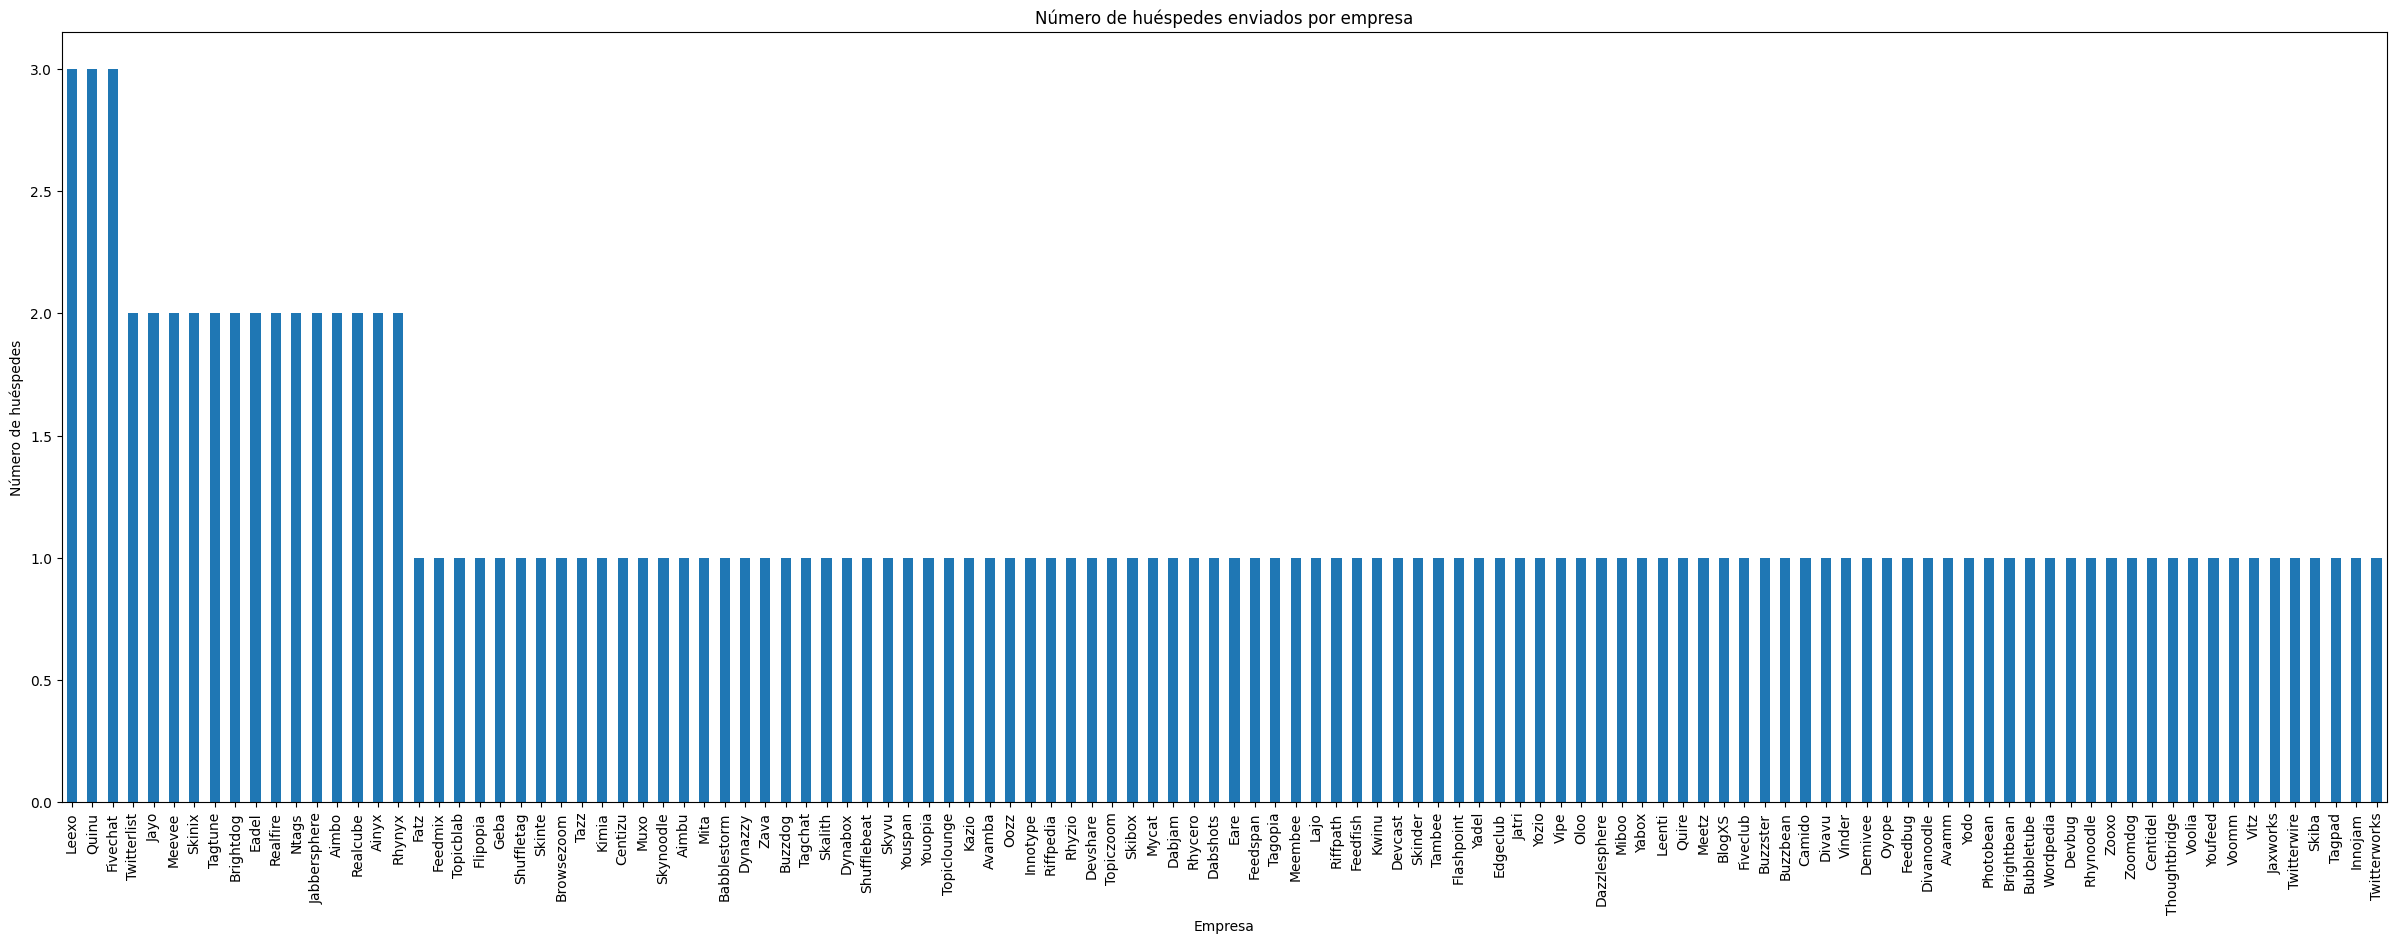

In [15]:
import matplotlib.pyplot as plt
print("El número de huespedes en el hotel por cada empresa se ve visualmente como")
cuenta = df["Company"].value_counts()
plt.figure(figsize=(30,10))
cuenta.plot(kind="bar")
plt.title("Número de huéspedes enviados por empresa")
plt.xlabel("Empresa")
plt.ylabel("Número de huéspedes")
plt.xticks(rotation=90)
plt.show()